***
# SpaceX Falcon 9 first stage Landing Prediction
***



![Alt Text](https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExZzlla2JvbXAwNWJxOXc0ZGR4ajVjcmdobnNkMnlxeHgyN3cxMGt5NCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/xT39CRup15MdJgjLy0/giphy.webp)
***

## <u>Exploratory Data Analysis</u> 


In [1]:
#Importing neccessary libraries:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
url = "https://raw.githubusercontent.com/Naveen-Baburaj/SpaceX-Falcon-9-first-stage-Landing-Prediction/main/SpaceXdataset.csv"
df = pd.read_csv(url)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


### Plotting Flight Number vs Payload Mass with Launch Outcome

We can visualise the relationship between `FlightNumber` and `PayloadMass` while overlaying the launch outcome (`Class`). This helps us see if the number of launches and the payload mass impact the success rate of landings.

C:\Users\navbc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


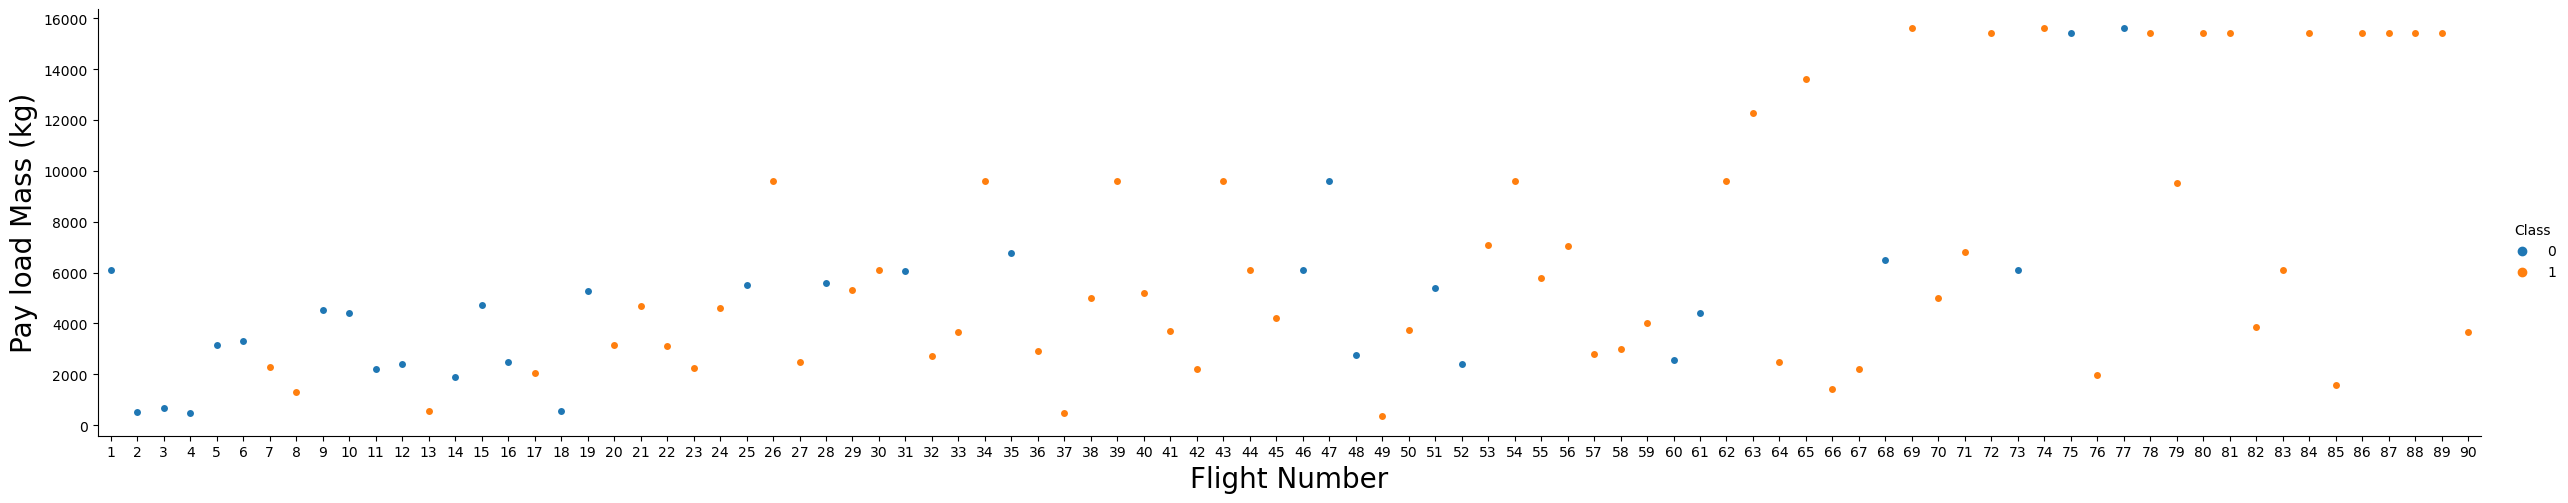

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

### Scatter Plot: Payload Mass vs Launch Site with Launch Outcome

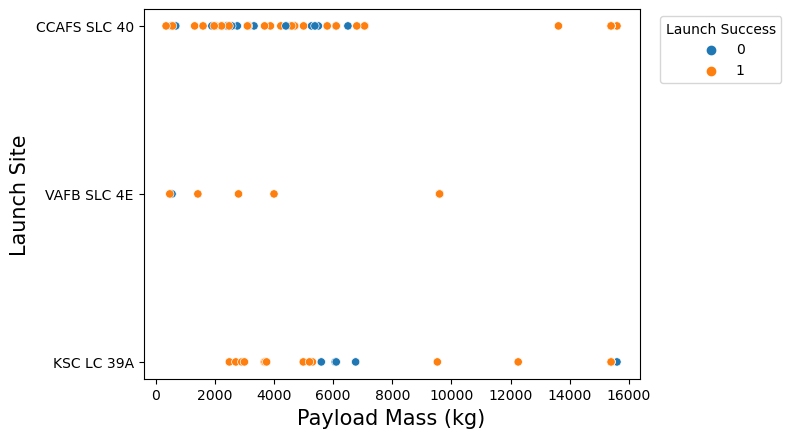

In [4]:
sns.scatterplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df)

plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.legend(title='Launch Success', bbox_to_anchor=(1.3, 1))

plt.show()

### SpaceX Launch Sites

#### 1. CCAFS SLC-40 (Cape Canaveral Air Force Station Space Launch Complex 40)
- **Location**: Cape Canaveral, Florida, USA.
- **Usage**: 
  - Primarily used for launching the Falcon 9 rocket.
  - Key launch site for many of SpaceX's commercial satellite launches, resupply missions to the International Space Station (ISS), and other missions.

#### 2. VAFB SLC-4E (Vandenberg Air Force Base Space Launch Complex 4E)
- **Location**: Vandenberg Air Force Base, California, USA.
- **Usage**: 
  - Used for launching the Falcon 9 rocket, particularly for missions requiring a polar or sun-synchronous orbit.
  - Supports a range of commercial and government payloads.

#### 3. KSC LC 39A (Kennedy Space Center Launch Complex 39A)
- **Location**: Kennedy Space Center, Florida, USA.
- **Usage**: 
  - Historic launch site used for Apollo and Space Shuttle missions.
  - Refurbished by SpaceX for launching Falcon 9 and Falcon Heavy rockets.
  - Supports crewed missions to the ISS and satellite deployments.


### Visualising the Relationship Between Success Rate and Orbit Type

To visualise the relationship between the success rate of each orbit type, we can create a bar chart. We will first calculate the success rate for each orbit by grouping the data by the Orbit column and then calculating the mean of the Class column, which indicates the success of each launch.

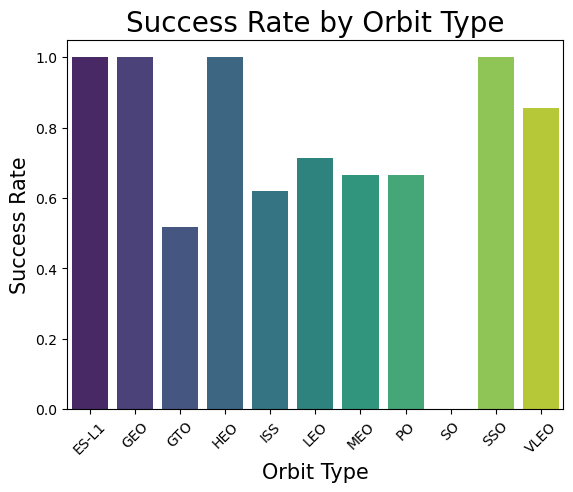

In [5]:
#Calculate success rate for each orbit type
success_rate = df.groupby('Orbit')['Class'].mean().reset_index()
success_rate.columns = ['Orbit', 'SuccessRate']

# Plotting the success rate for each orbit type
sns.barplot(x='Orbit', y='SuccessRate', data=success_rate, palette='viridis')
plt.title('Success Rate by Orbit Type', fontsize=20)
plt.xlabel('Orbit Type', fontsize=15)
plt.ylabel('Success Rate', fontsize=15)
plt.xticks(rotation=45)
plt.show()

### Scatter Point Chart of Flight Number vs. Orbit

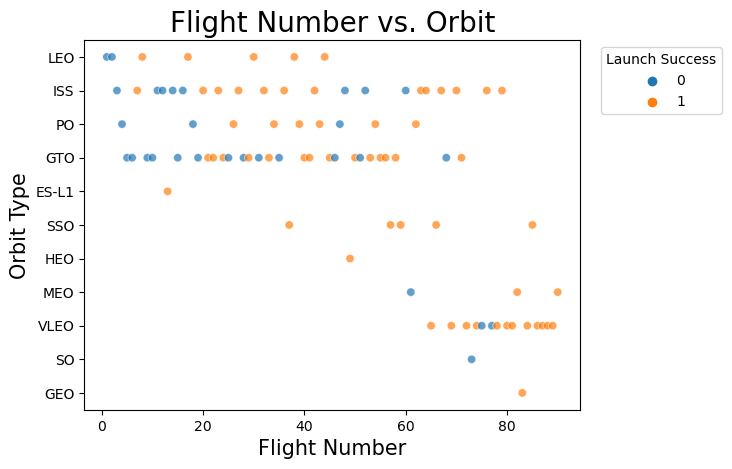

In [6]:
sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=df, alpha=0.7)
plt.title('Flight Number vs. Orbit', fontsize=20)
plt.xlabel('Flight Number', fontsize=15)
plt.ylabel('Orbit Type', fontsize=15)
plt.legend(title='Launch Success', bbox_to_anchor=(1.3, 1))
plt.show()

### Scatter Plot of Payload Mass vs Orbit

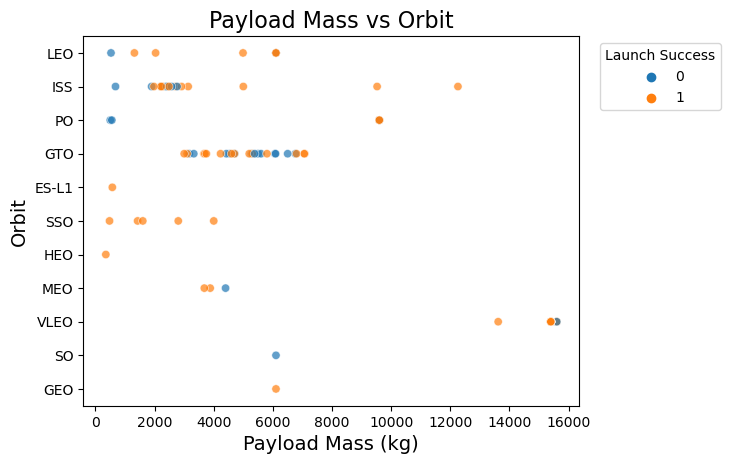

In [7]:
sns.scatterplot(x='PayloadMass', y='Orbit', hue='Class', data=df, alpha=0.7)

plt.xlabel('Payload Mass (kg)', fontsize=14)
plt.ylabel('Orbit', fontsize=14)
plt.title('Payload Mass vs Orbit', fontsize=16)

plt.legend(title='Launch Success', bbox_to_anchor=(1.3, 1))
plt.show()

#### Orbit Types

- **GTO**: Elliptical orbit for transferring satellites to geostationary orbit.
- **ISS**: Modular space station in low Earth orbit for research and collaboration.
- **VLEO**: Orbit below 450 km for close Earth observation.
- **PO**: Satellite passes over both poles for global coverage.
- **LEO**: Orbit up to 2,000 km for communication and imaging satellites.
- **SSO**: Near-polar orbit for consistent solar exposure.
- **MEO**: Geocentric orbits from 2,000 km to just below geostationary.
- **ES-L1**: Stable point between Earth and Sun for spacecraft.
- **HEO**: Highly elliptical orbit for extended periods over certain regions.
- **SO**: Maintains consistent solar exposure over the Earth's surface.
- **GEO**: Circular orbit 35,786 km above the equator, appearing stationary.

### Launch success yearly trend

The following code defines a function that extracts the year from the "Date" column of the DataFrame. It appends each extracted year to a list called year and updates the "Date" column with the extracted year values.

In [9]:
year = []
df['Date'] = pd.to_datetime(df['Date'])
def Extract_year():
    for i in df["Date"]:
        year.append(i.year)  # Extract the year from the datetime.date object
    return year

Extract_year()
df['Date'] = year  # Update the Date column with extracted years
df.head() 

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


### Plotting Success Rate by Year


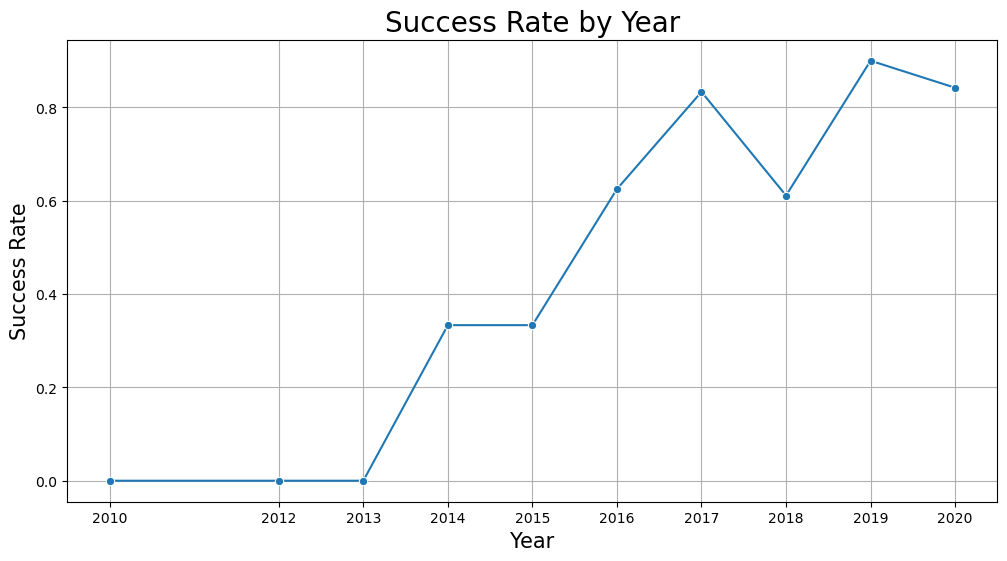

In [10]:
success_rate = df.groupby('Date')['Class'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=success_rate, x='Date', y='Class', marker='o')
plt.title('Success Rate by Year', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Success Rate', fontsize=15)
plt.xticks(success_rate['Date'])  
plt.grid()
plt.show()

 Sucess rate since 2013 kept increasing till 2020
 ***

## Feature Engineering

At this stage, we have gathered initial insights into the influence of key variables on the success rate. We will now proceed with selecting the most relevant features for accurate prediction.


In [11]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### One-hot encoding

One-hot encoding is a technique used to convert categorical variables into a numerical format that can be fed into machine learning algorithms. This method is particularly useful for handling categorical data that has no ordinal relationship.

In [12]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial']) #pd.get_dummies() is a function in the Pandas library that provides a convenient way to perform one-hot encoding on categorical data
features_one_hot.head() 


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


***